
# Predicting the Ratings 
---

# Introduction

Using tools of your choice, complete the following tasks. Keep it simple. The goal of the exercise is not to do the deepest EDA, build the best model possible, or spend lots of time building a robust solution. The goal is to demonstrate your ability to complete the end-to-end process in a reasonable timeframe and explain your thought process clearly.

## Dataset

This dataset contains data of over 1,000 products, including their ratings and reviews.

### Features

The dataset includes the following features:

- `product_id`: Product ID
- `product_name`: Name of the Product
- `category`: Category of the Product
- `discounted_price`: Discounted Price of the Product
- `actual_price`: Actual Price of the Product
- `discount_percentage`: Percentage of Discount for the Product
- `rating`: Rating of the Product
- `rating_count`: Number of people who voted for the Amazon rating

This rich dataset offers a comprehensive view of products, covering various aspects like pricing, ratings, and customer feedback, for data analysis and insight.


## Hints

###### Time Management and Simplicity
- Start with simple methods and ensure all necessary components are functioning correctly.

- Use markdown in your Notebook to record assumptions, decisions, and any experimental techniques.

- Explain the creation and transformation of data columns, focusing on how these changes can enhance insights and model performance.

###### Exploratory Data Analysis (EDA)
- Evaluate data completeness and check for missing values.
- Generate visualisations to understand the distributions of variables like ‘category’, ‘actual_price’, ‘discount_price’, ‘discount’, ‘rating’, and ‘rating_count’. Include engineered columns if applicable.
- Investigate correlations between variables and describe the methods used for this analysis.

###### Model Development and Evaluation
- Build a model to predict ‘rating’, explaining the choice of modeling approach.
- Assess the model's accuracy and justify the chosen accuracy metric.

###### Insights, Explanation, and Model Improvement
- Analyse the importance of features in your model and the criteria for evaluating their significance.
- Describe the relationship between key variables and the prediction, including the methods used for this examination.
- Discuss the predictability of ‘rating’ based on available data and provide reasons.
- Suggest methods to enhance model performance.
- Offer a simplified, non-technical summary of your findings and learnings from the analysis.

###### Modeling Methodology
- Provide a concise explanation of your choices in the modeling process, highlighting alignment with analysis objectives.

###### Model Evaluation and Metrics
- Discuss your approach to evaluating model accuracy and the rationale behind the selection of specific evaluation metrics.


## Interview Focus

During the interview, we are most interested in the following:

1. Your understanding of how your model is performing with respect to the business problem.
2. Your ability to explain the assumptions and modeling decisions you have made.
3. Your plan for how you would put this model into production.
---

### Getting started
The data for this interview case is provided in a parquet file that can be loaded directly into a pandas dataframe as shown below. In order for reading parquet file make sure the pyarrow package is installed.

In [1]:
###### Load data to DataFrame
import pandas as pd
df = pd.read_csv('data/raw_data/amazon.csv')

In [2]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count'],
      dtype='object')

### 1)	Load data

#### a.	Load the data into the environment of your choice.

I created a virtual environment on my own device using pipenv python package. In that environment I installed pandas which is typically used for analysis process and visualization of data sets. All the code can be found in github repository. This notebook uses the data created in teh respository so iit is recommended to run it first

### 2)	Clean data (the code for the cleaning data part can be found in github repository)
https://github.com/JoseCelis/ReMark_case/blob/main/src/process_data.py

#### a.	Clean the data so that it is more usable for subsequent steps.  At least two columns should be transformed.


In order to create a model, I need to clean the data. The fist step is then, remove the columns that will not contribute to a model. For example 

•	Product_Id, is a unique id of the product, we can set it as an index and do not use it as a feature.

•	Price columns:
Both columns where strings with the respective currency symbol in there, they were converted to float.

### 3)	Feature engineering
#### a.	Transform at least one column into another column or columns, which have potential use for exploratory data analysis and/or modeling.


•	Category

This column is a string that contains the category and sub categories of the product devided by the character ‘|’. From this column I expand the information to obtain the sub categories as different categorical columns. This can be useful during the model because they will provide detailed information about the purpose of the product and the target consumers.

•	Product_name

This column contains the name and a short description of the product. From here it is possible to extract extra information like color, shape, size, etc. 
I processed this column using basic Natural Language Processing where I vectorize the expression removing the so called stop words and creating binary columns that says if a word appears in the product description.


### 4)	Exploratory Data Analysis (EDA) (the code for the EDA part can be found in github repository)
https://github.com/JoseCelis/ReMark_case/blob/main/EDA/explore_data.py
#### a.	How complete is the data? 
##### i.	Are there missing values?


As part of the code, one report in printed in the EDA/analysis/report.txt file it contains a small description of the results obtained

counting the number of null values 
```
column                     N null values
product_id                       0
product_name                     2
category                         3
discounted_price                 3
actual_price                     3
discount_percentage              3
rating                           3
rating_count                     5
```

Deciding what to do with the empty cells:
initial length of data file 1465
length of data file after dropping rows with null values 1460
initial distributon of the target variable 
```
4.1    243
4.3    230
4.2    227
4.0    129
3.9    123
4.4    122
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
```

distributon of the target variable after dropping rows wth null values 
```
4.1    243
4.3    230
4.2    227
4.0    129
3.9    123
4.4    122
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
3.2      2
2.8      2
3.0      2
5.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
```

One character that do not correspond to a number was found in the target column

#### b.	Create visualizations which explain the distributions of ‘category’, ‘actual_price’, ‘discount_price’, ‘discount’, ‘rating’, and ‘rating_count’
##### i.	If you have decided to engineer new columns based on any of the above columns, you may use the columns you created instead.


In [4]:
processed_df = pd.read_parquet('data/preprocessed/data.parquet')

In [5]:
processed_df.head()

,catlevel0,catlevel1,catlevel2,catlevel3,catlevel4,catlevel5,catlevel6,10,100,1000,...,white,wired,wireless,year,zebronics,discounted_price,actual_price,discount_percentage,rating,rating_count
0,ComputersAccessories,AccessoriesPeripherals,CablesAccessories,Cables,USBCables,NaN,NaN,0,0,0,...,0,0,0,0,0,399.0,1099.0,64.0,4,24269.0
1,ComputersAccessories,AccessoriesPeripherals,CablesAccessories,Cables,USBCables,NaN,NaN,0,0,0,...,0,0,0,0,0,199.0,349.0,43.0,4,43994.0
2,ComputersAccessories,AccessoriesPeripherals,CablesAccessories,Cables,USBCables,NaN,NaN,0,0,0,...,0,0,0,0,0,199.0,1899.0,90.0,4,7928.0
3,ComputersAccessories,AccessoriesPeripherals,CablesAccessories,Cables,USBCables,NaN,NaN,0,0,0,...,0,0,0,0,0,329.0,699.0,53.0,4,94363.0
4,ComputersAccessories,AccessoriesPeripherals,CablesAccessories,Cables,USBCables,NaN,NaN,0,0,0,...,0,0,0,0,0,154.0,399.0,61.0,4,16905.0


In [6]:
import seaborn as sns

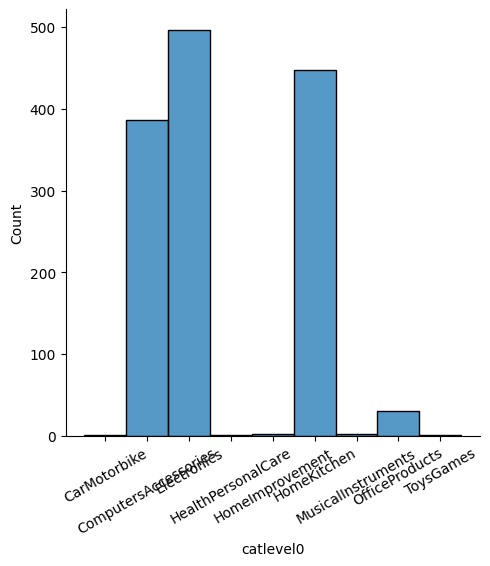

In [8]:
fig = sns.displot(processed_df['catlevel0'])
fig.set_xticklabels(rotation=30)

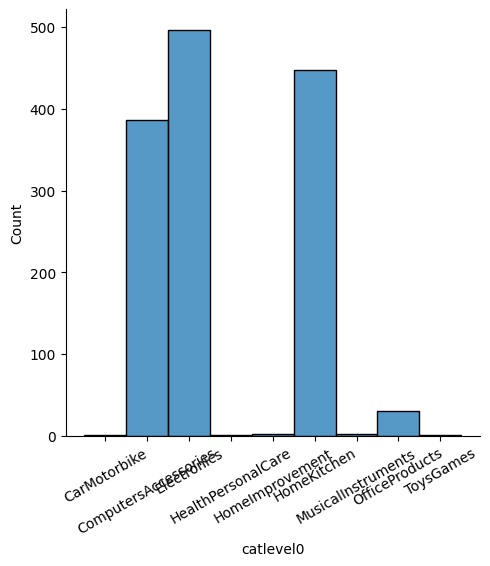

In [9]:
fig = sns.displot(processed_df['catlevel0'])
fig.set_xticklabels(rotation=30)

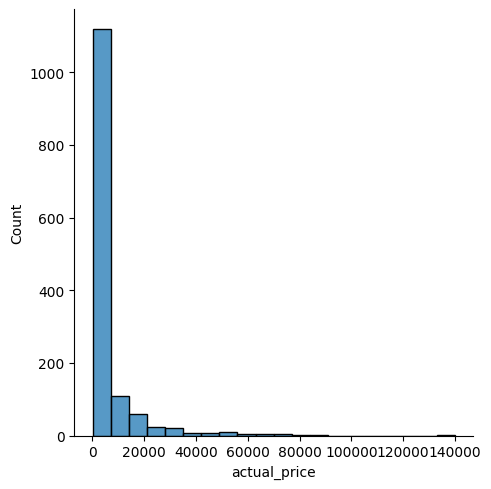

In [13]:
fig = sns.displot(processed_df['actual_price'], bins=20)

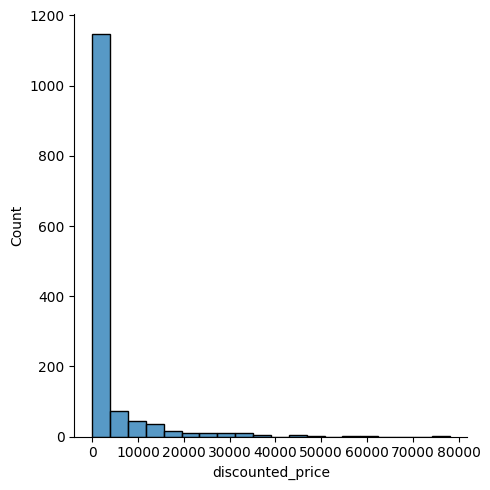

In [15]:
fig = sns.displot(processed_df['discounted_price'], bins=20)

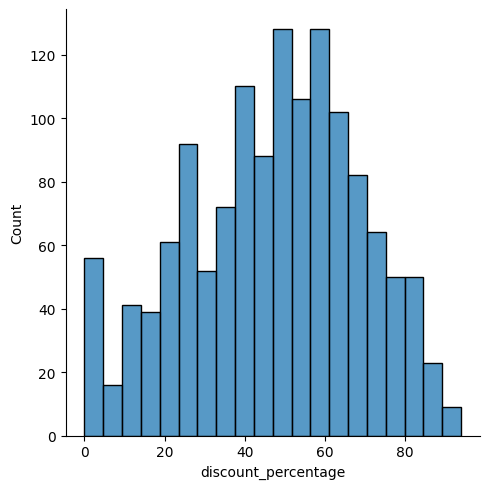

In [16]:
sns.displot(processed_df['discount_percentage'], bins=20)

#### c) Are any of these variables correlated?
##### i. How do you know?

It is clear that the prices difference and the discount percentage columns are correlated, however iit iis enough if we jus remove one of them.

In [18]:
plot_columns = ['discounted_price','actual_price','discount_percentage','rating','rating_count']

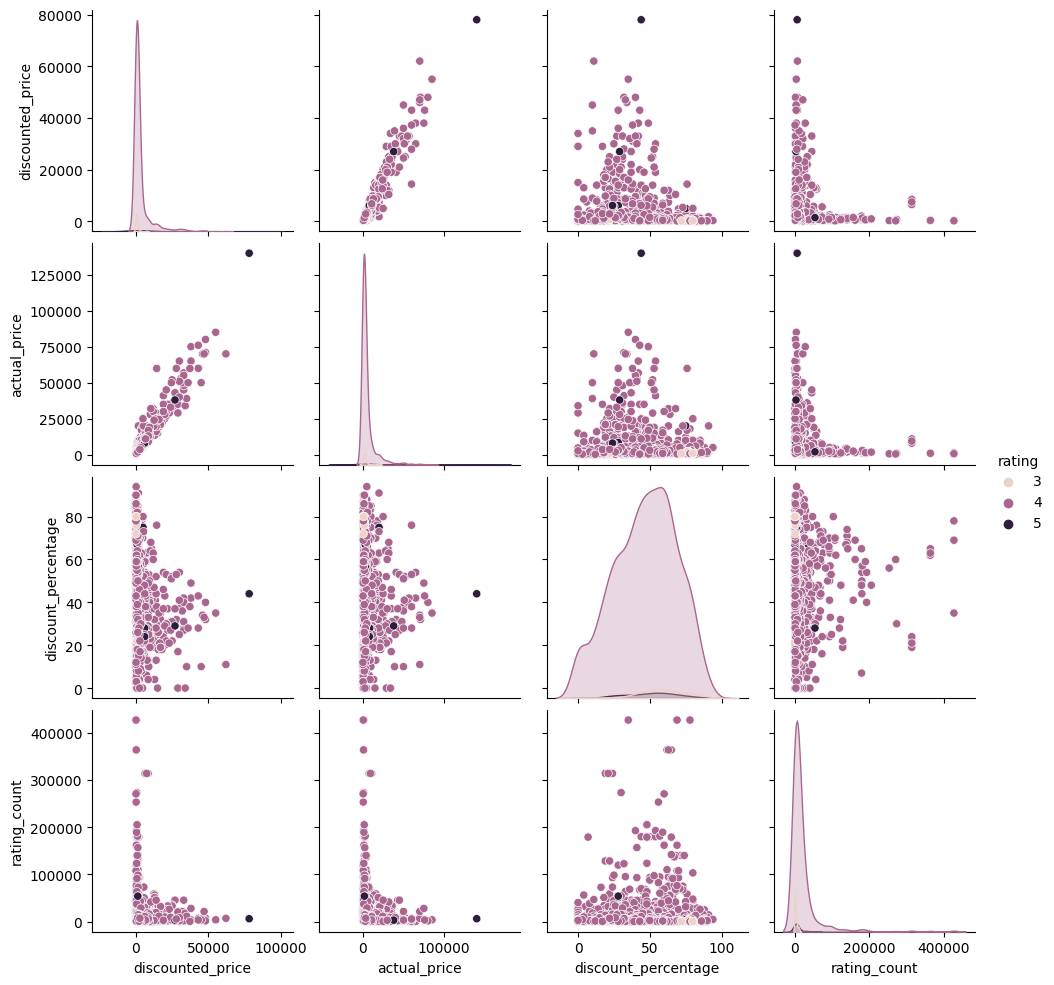

In [21]:
sns.pairplot(processed_df[plot_columns], hue="rating")

### 5) Model (The detailed code can be found in the github repository)
https://github.com/JoseCelis/ReMark_case/blob/main/src/model.py
#### a. Build a model to predict rating.

The model is created in the `src/model.py` script

##### i. What modeling approach did you use and why?

Initially I used a regression technique, however, I notiiced that the data was highly iimbalanced and we have many more points with rating values between 4 and 5 compare to the other values. To solve this,  rounded the rating values to its closest integer and I proceed with a classification technique.

even with that, there were only two points with ratiing value 2. so I needed to move these two point to a new category
```
category 1 : <3.0
category 2 : 3.1-4.0
category 3 : 4.1-5.0
```

#### b. What is the accuracy of your model?

I ran a 5 fold cross validation model using `catboost`. 
The data was so imbalace that I used `smote` to balance the categories.
I used shallow trees to do feature selection.
I optimizing the parameters using random grid search

I splt the data in train and test have=ng 70% of the data for the train the model and 30% for testing.

the results of the train can be found below.
The metrics selected are AUC, although I printed more
```
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9403  0.8215  0.9403  0.9403  0.9403  0.3093  0.3093
1       0.9403  0.8474  0.9403  0.9118  0.9258 -0.0190 -0.0221
2       0.9328  0.8702  0.9328  0.9442  0.9382  0.4114  0.4150
3       0.9478  0.7653  0.9478  0.9159  0.9311  0.2091  0.2542
4       0.9403  0.7609  0.9403  0.9281  0.9337  0.3604  0.3630
Mean    0.9403  0.8131  0.9403  0.9280  0.9338  0.2542  0.2639
Std     0.0047  0.0436  0.0047  0.0128  0.0051  0.1521  0.1527

##### i. Why did you choose this accuracy metric

The AUC is an aggregate measurement and measures the performance across all possible classification thresholds, which gives a good estiimate of the general classificaton.

### 6) Understand and Explain
#### a. What is the relative importance/significance of the features you used in your model?

The relative importance can be obtained as a result of hte model. In the catboost method, it is posible to obtan the gain and split values

##### i, What importance/significance metric did you choose and why? 

I selected Gain, ths metric shows the informatiion gained everytime a new leaf s created for a giiven feature, the bigger the number the biigger the iinformatiion gained which can be translated to the significance of the feature for the target.

#### b) Describe the relationship between the most important variable and the prediction.
##### i. What method did you use to examine this relationship and why?

#### c) Do you believe that the ‘rating’ variable is able to be predicted based on the data available? 

##### i. Why or why not?

I consider that with the data provided it is not possible to have a reliable prediction of the rating. There iis not enough poiints to describe the target. Although it is possible to extract a lot of informataiion from the features, the target is the key for a prediction, but in this case we do not have it.

#### d) Suggest at least two ways to improve the model performance.

With a bigger dataset t would be possible to have a better model. In my case I needed to use a classifiicatiion iinstead of a regression because the diistribution of points in the target column was not uniform enough to allows us to do it.

#### e) In a few paragraphs or less, explain to a non-technical audience what you learned during this analysis.  Keep your description as simple and easy to understand as possible.

depending on the problem we can deciide to do a classification or a regression. 
Regressions help us have an idea about the behavior of one target variable that can have a range of values, in general continuous variables.
On the other hand classifications is like sorting objects into different groups based on certain characteristics.
Initially my idea was to perform a regression, however with every step I noticed the distribution of the target variable was highly imbalaced which makes me conclude that deffinitely I will not do it in that way. But not everything was lost, I wiith the poiints I had, I grouped them to create categoriies and perform a classification sorting the ratings in buckets.
ion.